# B-scan from a water pocket (2D)

INtro needed here

In [1]:
#import
from math import sqrt
import os

In [2]:
#tips to force file closure: 
#os.close(n) #n is found there->  /proc/ipython_pid/fd/ ; or just try from 1 onward...

In [2]:
#You current directory:
%pwd

'/scratch-3/cogier/gprMax/tools/Jupyter_notebooks'

# Write `input_file`

In [4]:
#paths and filenames

###CHANGE
file="waterpocket_fractal_2D" #file name


#ROUTINE
data_path= "../../../gprMax_data"+os.sep+file
generic_file=os.path.join(data_path,file)
input_file=os.path.join(data_path,file)+".in"
output_file=os.path.join(data_path,file)+"_merged.out"


#cretation of the sub folder os.path.join(input_path,file)  if not existing already
if not os.path.isdir(data_path): 
    os.makedirs(data_path)


In [5]:
#note: there is a better and more robust way to define an input file: see gprMax/gprMax/input_cmd_funcs.py

In [3]:
%%writefile {input_file}
#title: B-scan from a spherical water pocket buried in a snowcover 2D-glacier
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 400e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water
#material: 2.3 1e-4 1 0 wet_snow


#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 3 32.5 0 my_ricker
#rx: 7 32.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0


#soil_peplinski: 0.5 0.5 2.0 2.66 0.001 0.25 my_soil
#fractal_box: 0 0 0 50 30 0.1 1.5 1 1 1 50 my_soil my_soil_box
#box: 0 30 0 50 32 0.1 wet_snow
#sphere: 25 5 0 3 fresh_water
#box: 0 0 0 50 5 0.1 granite




#python:
from gprMax.input_cmd_funcs import *
for i in range(1, 40):
    snapshot(0, 0, 0, 50, 40, 0.1, 0.1, 0.1, 0.1, i*10e-9, 'snapshot' + str(i))
#end_python:

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_fractal_2D n


Writing {input_file}


In [13]:
#geometry_objects_read: 0 0 0 ../../../gprMax_data/waterpocket_realbed_2D/bed2D.h5  ../../../gprMax_data/waterpocket_realbed_2D/bed_materials.txt

In [14]:
input_file

'../../../gprMax_data/waterpocket_fractal_2D/waterpocket_fractal_2D.in'

In [15]:
#%run -m gprMax {input_file} -n 1 -gpu --geometry-only

In [16]:
#%run -m tools.plot_Ascan ../../user_models/heterogeneous_soil.out 

In [17]:
%run -m gprMax {input_file} -n 35 -gpu
%run -m tools.outputfiles_merge {generic_file}

StopIteration: 

/home/cogier/miniconda3/envs/gprMax/lib/python3.9/site-packages/IPython/core/interactiveshell.py:2873: UserWarning: Unknown failure executing module: <gprMax>
  warn('Unknown failure executing module: <%s>' % mod_name)


# Plot output

In [28]:
output_file_3D="../../../gprMax_data/wp_test_3D/wp_test_3D_merged.out"
output_file_2D="../../../gprMax_data/wp_test_2D/wp_test_2D_merged.out"

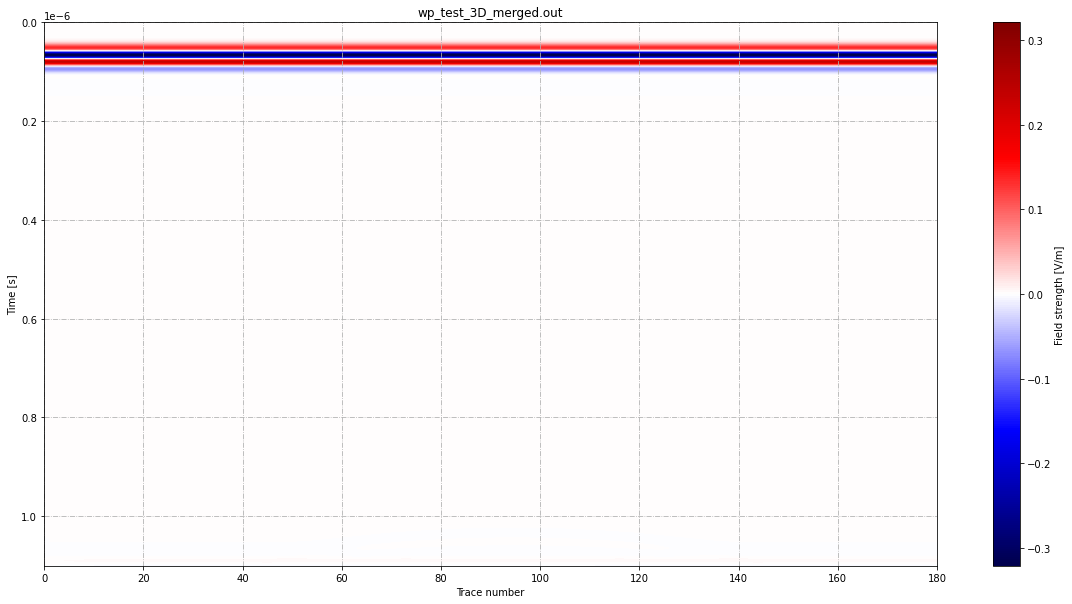

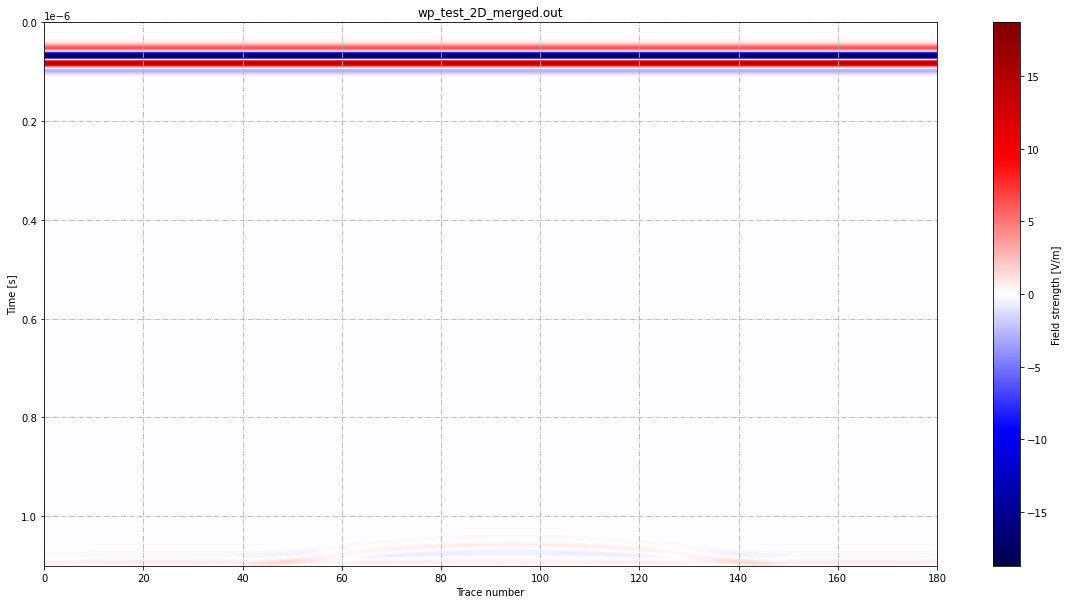

In [29]:
%run -m tools.plot_Bscan {output_file_3D} Ez
%run -m tools.plot_Bscan {output_file_2D} Ez

# Run `input_file` on GPU

In [ ]:
#Here make a loop with fnames to run the loop

In [3]:
###CHANGE
file="waterpocket_newsnow_2D" #file name


#ROUTINE
data_path= "../../../gprMax_data"+os.sep+file
generic_file=os.path.join(data_path,file)
input_file=os.path.join(data_path,file)+".in"
output_file=os.path.join(data_path,file)+"_merged.out"


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.5 (Big Smoke)

 Copyright (C) 2015-2020: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D2.out

Running simulation, model 2/40: 100%|████| 1697/1697 [00:00<00:00, 4684.36it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.371100

--- Model 3/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 3, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 1 =

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D6.out

Running simulation, model 6/40: 100%|████| 1697/1697 [00:00<00:00, 4641.83it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.374009

--- Model 7/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 7, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 1 =

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D10.out

Running simulation, model 10/40: 100%|███| 1697/1697 [00:00<00:00, 4675.10it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.371543

--- Model 11/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 11, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D14.out

Running simulation, model 14/40: 100%|███| 1697/1697 [00:00<00:00, 4688.08it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.372877

--- Model 15/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 15, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D18.out

Running simulation, model 18/40: 100%|███| 1697/1697 [00:00<00:00, 4517.98it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.384855

--- Model 19/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 19, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D22.out

Running simulation, model 22/40: 100%|███| 1697/1697 [00:00<00:00, 4697.19it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.370383

--- Model 23/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 23, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D26.out

Running simulation, model 26/40: 100%|███| 1697/1697 [00:00<00:00, 4724.19it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.368077

--- Model 27/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 27, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D30.out

Running simulation, model 30/40: 100%|███| 1697/1697 [00:00<00:00, 4682.14it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.370996

--- Model 31/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 31, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D34.out

Running simulation, model 34/40: 100%|███| 1697/1697 [00:00<00:00, 4726.42it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.367770

--- Model 35/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 35, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

  9 | salt_water+salt_water+ice+salt_water | dielectric-smoothed | 60.8  | 2.25        | 1    | 0       | True       


Output file: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D38.out

Running simulation, model 38/40: 100%|███| 1697/1697 [00:00<00:00, 4595.22it/s]
Memory (RAM) used: ~300MB host + ~462MB GPU
Solving time [HH:MM:SS]: 0:00:00.376620

--- Model 39/40, input file: ../../../gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in 

Constants/variables used/available for Python scripting: {c: 299792458.0, current_model_run: 39, e0: 8.8541878128e-12, inputfile: /scratch-2/cogier/gprMax_data/waterpocket_newsnow_2D/waterpocket_newsnow_2D.in, m0: 1.25663706212e-06, number_model_runs: 40, z0: 376.73031366686166}

Model title: B-scan from a salty water pocket buried in a snowfree ice 2D-space
Number of CPU (OpenMP) threads: 16
GPU solving using: 0 - GeForce RTX 2070
Spatial discretisation: 0.1 x 0.1 x 0.1m
Domain size: 50 x 40 x 0.1m (500 x 400 x 

/home/cogier/miniconda3/envs/gprMax/lib/python3.9/runpy.py:127: RuntimeWarning: 'tools.outputfiles_merge' found in sys.modules after import of package 'tools', but prior to execution of 'tools.outputfiles_merge'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


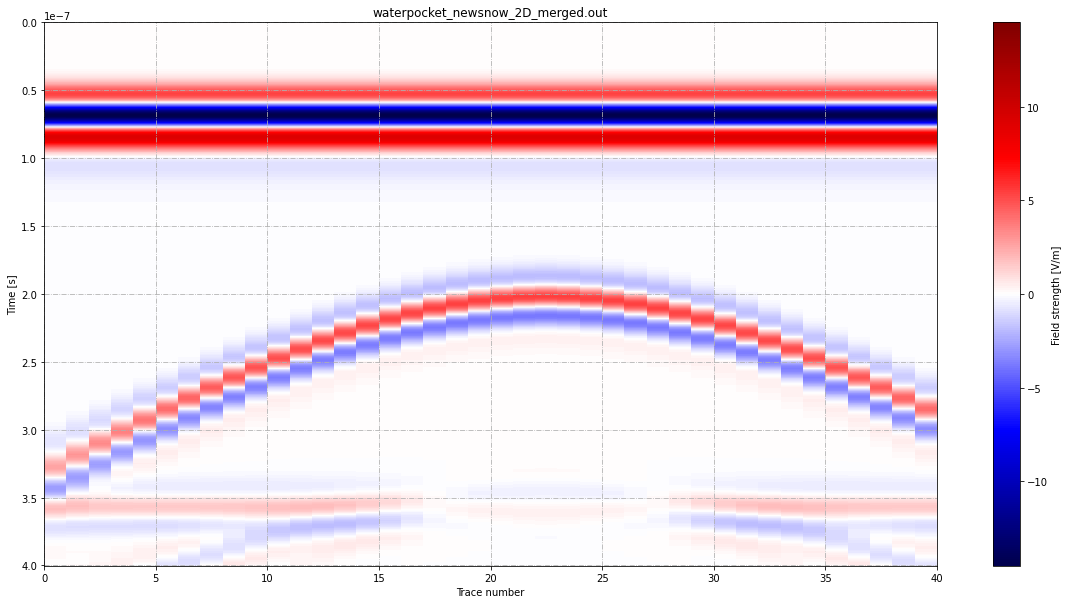

In [43]:
%run -m gprMax {input_file} -n 40 -gpu
%run -m tools.outputfiles_merge {generic_file}

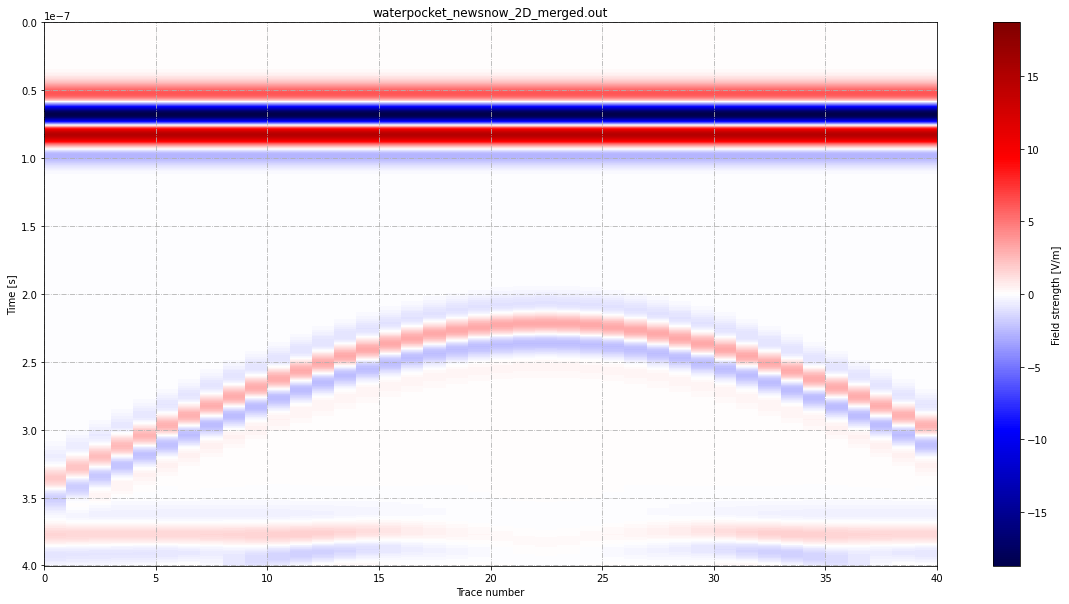

In [5]:
%run -m tools.plot_Bscan {output_file} Ez

# Water pocket in contact with the bed

In [63]:
###CHANGE
file="waterpocket_bed_2D" #file name


#ROUTINE
data_path= "../../../gprMax_data"+os.sep+file
generic_file=os.path.join(data_path,file)
input_file=os.path.join(data_path,file)+".in"
output_file=os.path.join(data_path,file)+"_merged.out"


#cretation of the sub folder os.path.join(input_path,file)  if not existing already
if not os.path.isdir(data_path): 
    os.makedirs(data_path)

In [64]:
#tips for "cut/past" object from and to .in file
#I wrote a usual in file with a sphere
#In the same file I wrote the line bellow to cut the sphere in half, and to save it
#geometry_objects_write: 22 15 0 28 18 0.1 half_sphere
#I wrote again a new in file with this time no sphere but the half sphere saved by using geometry_objects_read

In [65]:
input_file

'../../../gprMax_data/waterpocket_bed_2D/waterpocket_bed_2D.in'

In [67]:
%%writefile {input_file}
#title: B-scan from a water pocket at bed interface buried in a snowfree ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 400e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water


#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 30.5 0 my_ricker
#rx: 5 30.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#sphere: 25 5 0 3 fresh_water
#geometry_objects_read: 0 0 0 ../../user_models/waterpocket_realbed_2D/bed.h5  ../../user_models/waterpocket_realbed_2D/bed_materials.txt


#python:
from gprMax.input_cmd_funcs import *
for i in range(1, 40):
    snapshot(0, 0, 0, 50, 40, 0.1, 0.1, 0.1, 0.1, i*10e-9, 'snapshot' + str(i))
#end_python:

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_bed n


In [68]:
%run -m gprMax {input_file} -n 40 -gpu
%run -m tools.outputfiles_merge {generic_file}

/home/cogier/miniconda3/envs/gprMax/lib/python3.9/runpy.py:127: RuntimeWarning: 'tools.outputfiles_merge' found in sys.modules after import of package 'tools', but prior to execution of 'tools.outputfiles_merge'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))


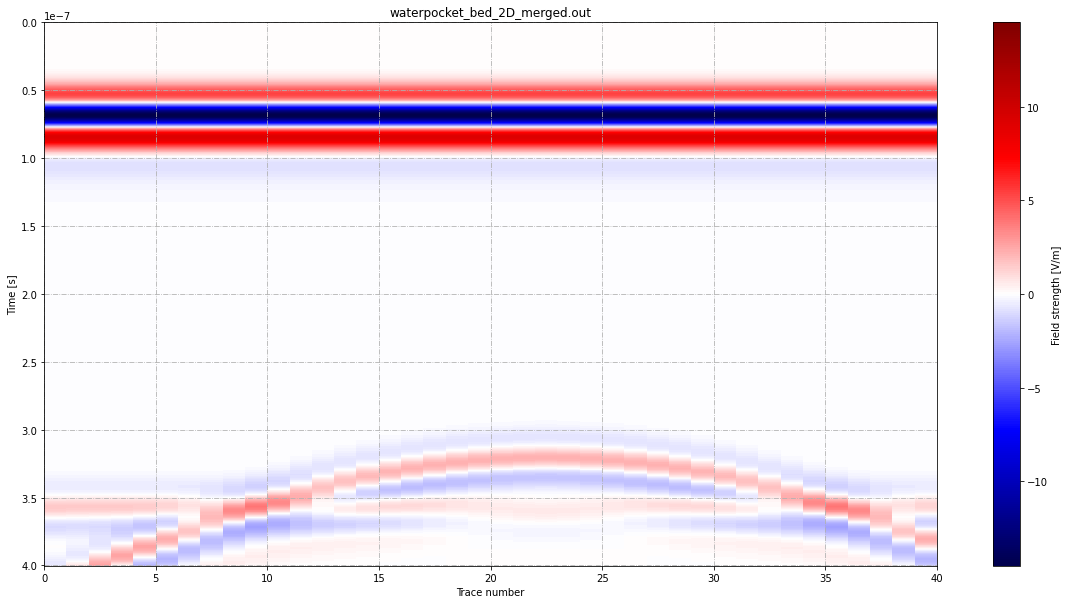

In [70]:
%run -m tools.plot_Bscan {output_file} Ez

## Implementation of a realistic bedrock shape

In [ ]:
#METHOD
#create a object on inkscape: change the png size (pixel) to match your model space. Save as PNG
# python -m tools.convert_png2h5 user_models/waterpocket_realbed_2D/bed.png 0.1 0.1 0.1 -zcells 1
#write a material.txt associated to the .h5 created above
#geometry_objects_read: .....

In [19]:
#paths and filenames
file="waterpocket_realbed_2D" #file name
direname="../../user_models/"+file #folder path
basename=os.path.join(direname,file) #filename path (=name of the model)
fname=basename+".in" #filename path input defined bellow
outputname=basename+'_merged.out' #output path after model output had been merged in one single output file

#cretation of the sub folder un gprMax/user_model/.. if not existing already
if not os.path.isdir(direname): 
    os.makedirs(direname)

In [22]:
%%writefile {fname}
#title: B-scan from a water pocket at bed interface buried in a snowfree ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 400e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water


#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 30.5 0 my_ricker
#rx: 5 30.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#sphere: 25 2 0 3 fresh_water
#geometry_objects_read: 0 0 0 ../../user_models/waterpocket_realbed_2D/bed2D.h5  ../../user_models/waterpocket_realbed_2D/bed_materials.txt

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_realbed n

Overwriting ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D.in


In [23]:
#%run -m gprMax ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D.in -n 1 --geometry-only

In [24]:
%run -m gprMax ../../../gprMax_data/waterpocket_realbed_2D/waterpocket_realbed_2D.in -n 40


=== Electromagnetic modelling software based on the Finite-Difference Time-Domain (FDTD) method 

    www.gprmax.com   __  __
     __ _ _ __  _ __|  \/  | __ ___  __
    / _` | '_ \| '__| |\/| |/ _` \ \/ /
   | (_| | |_) | |  | |  | | (_| |>  <
    \__, | .__/|_|  |_|  |_|\__,_/_/\_\
    |___/|_|
                     v3.1.5 (Big Smoke)

 Copyright (C) 2015-2020: The University of Edinburgh
 Authors: Craig Warren and Antonis Giannopoulos

 gprMax is free software: you can redistribute it and/or modify it under the
  terms of the GNU General Public License as published by the Free Software
  Foundation, either version 3 of the License, or (at your option) any later
  version.
 gprMax is distributed in the hope that it will be useful, but WITHOUT ANY
  WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR
  A PARTICULAR PURPOSE.  See the GNU General Public License for more details.
 You should have received a copy of the GNU General Public License along with
  gpr

AttributeError: 'FDTDGrid' object has no attribute 'updatecoeffsH'

In [46]:
#%run -m tools.outputfiles_merge ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D
#%run -m tools.plot_Bscan ../../user_models/waterpocket_realbed_2D/waterpocket_realbed_2D_merged.out Ez

# Water pocket in contact with the bed with snow layer

In [6]:
#paths and filenames
file="waterpocket_bed_snow_2D" #file name
direname="../../user_models/"+file #folder path
basename=os.path.join(direname,file) #filename path (=name of the model)
fname=basename+".in" #filename path input defined bellow
outputname=basename+'_merged.out' #output path after model output had been merged in one single output file

#cretation of the sub folder un gprMax/user_model/.. if not existing already
if not os.path.isdir(direname): 
    os.makedirs(direname)

In [7]:
%%writefile {fname}
#title: B-scan from a water pocket at bed interface buried in a snowcovered ice 2D-space
#domain: 50 40 0.1
#dx_dy_dz: 0.1 0.1 0.1
#time_window: 500e-9

#material: 3.2 5e-8 1 0 ice
#material: 6 0.001 1 0 granite
#material: 80 5e-4 1 0 fresh_water
#material: 50 1e-6 1 0 wet_snow



#waveform: ricker 1 25e6 my_ricker
#hertzian_dipole: z 1 32.5 0 my_ricker
#rx: 5 32.5 0
#src_steps: 1 0 0
#rx_steps: 1 0 0

#box: 0 0 0 50 30 0.1 ice
#box: 0 0 0 50 5 0.1 granite
#box: 0 30 0 50 32.5 0.1 wet_snow
#geometry_objects_read: 22 5 0 ../../user_models/waterpocket_bed_2D/half_sphere.h5  ../../user_models/waterpocket_bed_2D/half_sphere_materials.txt

#python:
from gprMax.input_cmd_funcs import *
for i in range(1, 40):
    snapshot(0, 0, 0, 50, 40, 0.1, 0.1, 0.1, 0.1, i*10e-9, 'snapshot' + str(i))
#end_python:

#geometry_view: 0 0 0 50 40 0.1 0.1 0.1 0.1 waterpocket_bed_snow n

Writing ../../user_models/waterpocket_bed_snow_2D\waterpocket_bed_snow_2D.in


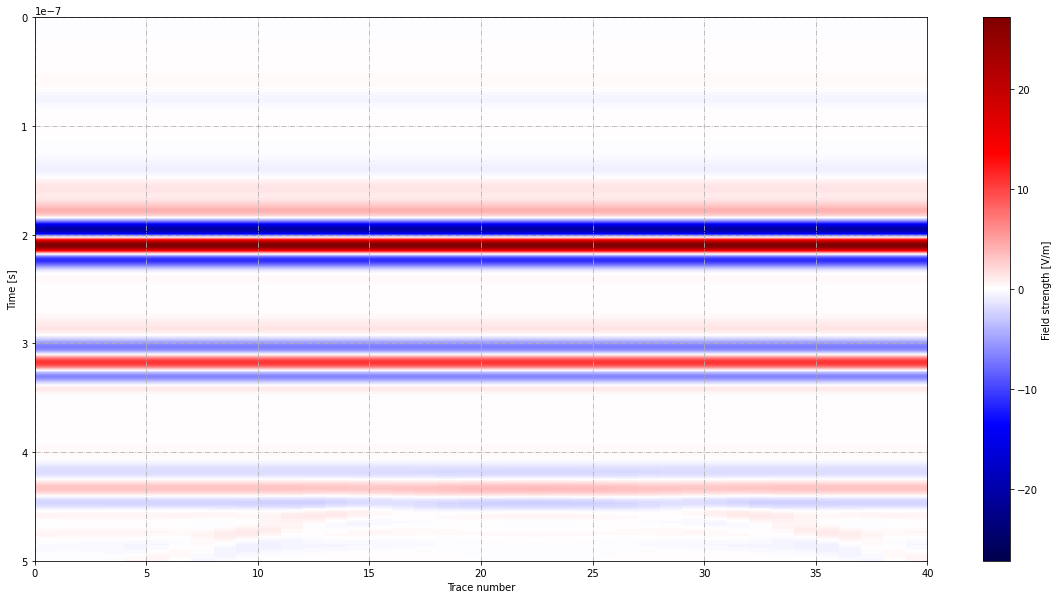

In [9]:
#%run -m gprMax ../../user_models/waterpocket_bed_snow_2D/waterpocket_bed_snow_2D.in -n 40
#%run -m tools.outputfiles_merge ../../user_models/waterpocket_bed_snow_2D/waterpocket_bed_snow_2D
%run -m tools.plot_Bscan ../../user_models/waterpocket_bed_snow_2D/waterpocket_bed_snow_2D_merged.out Ez